In [1]:
%reload_ext watermark
#%matplotlib inline

import os
from scipy.stats import mannwhitneyu, linregress, variation
from contextlib import suppress
from metapool.metapool import *
from metapool import validate_and_scrub_sample_sheet, make_sample_sheet
%watermark -i -v -iv -m -h -p metapool,sample_sheet,openpyxl -u

Last updated: 2023-04-25T11:57:12.916411-07:00

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.7.0

metapool    : 0+untagged.120.g8c29462
sample_sheet: 0.13.0
openpyxl    : 3.0.10

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Hostname: Caitrionas-MacBook-Pro.local

json      : 2.0.9
seaborn   : 0.12.1
numpy     : 1.23.4
re        : 2.2.1
pandas    : 1.5.1
matplotlib: 3.5.3



In [2]:
set1_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set1_df_wcounts.csv')
set2_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set2_df_wcounts.csv')
set3_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set3_df_wcounts.csv')
set4_df = pd.read_csv('./QC/2022_07_20_ww_metaT_set4_df_wcounts.csv')

In [3]:
metaT_df = pd.concat([set1_df,set2_df,set3_df,set4_df])

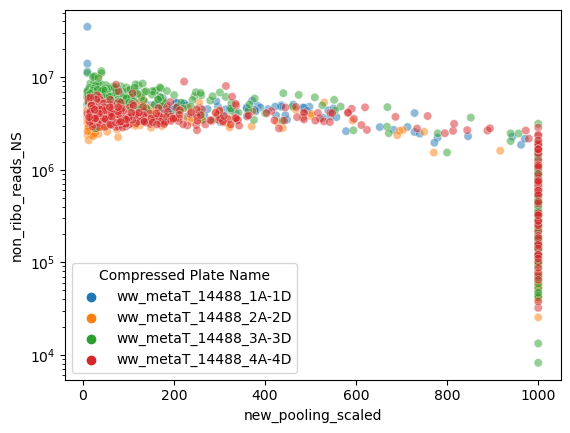

In [4]:
sns.scatterplot(x='new_pooling_scaled',y='non_ribo_reads_NS',hue='Compressed Plate Name',
               data=metaT_df,alpha=0.5)
plt.yscale('log')

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/55406338.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_1A-1D',
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/55406338.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

<AxesSubplot:xlabel='non_ribo_reads_NS', ylabel='Density'>

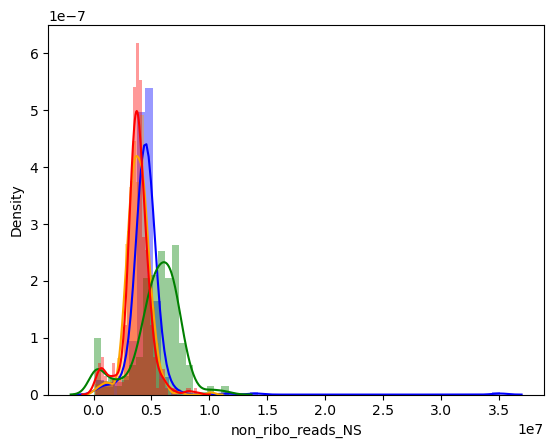

In [5]:
no_blanks_df = metaT_df.loc[metaT_df['Blank']==False]
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_1A-1D',
                              'non_ribo_reads_NS'],color='blue')
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_2A-2D',
                              'non_ribo_reads_NS'],color='orange')
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_3A-3D',
                              'non_ribo_reads_NS'],color='green')
sns.distplot(no_blanks_df.loc[no_blanks_df['Compressed Plate Name']=='ww_metaT_14488_4A-4D',
                              'non_ribo_reads_NS'],color='red')

In [7]:
metaT_df['ribo_reads_NS'] = metaT_df['Total Reads NS'] - metaT_df['non_ribo_reads_NS']

0


/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='ribo_reads_NS',ascending=False,inplace=True)


1


/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='ribo_reads_NS',ascending=False,inplace=True)


2


/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='ribo_reads_NS',ascending=False,inplace=True)


3


/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2022469774.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_df.sort_values(by='ribo_reads_NS',ascending=False,inplace=True)


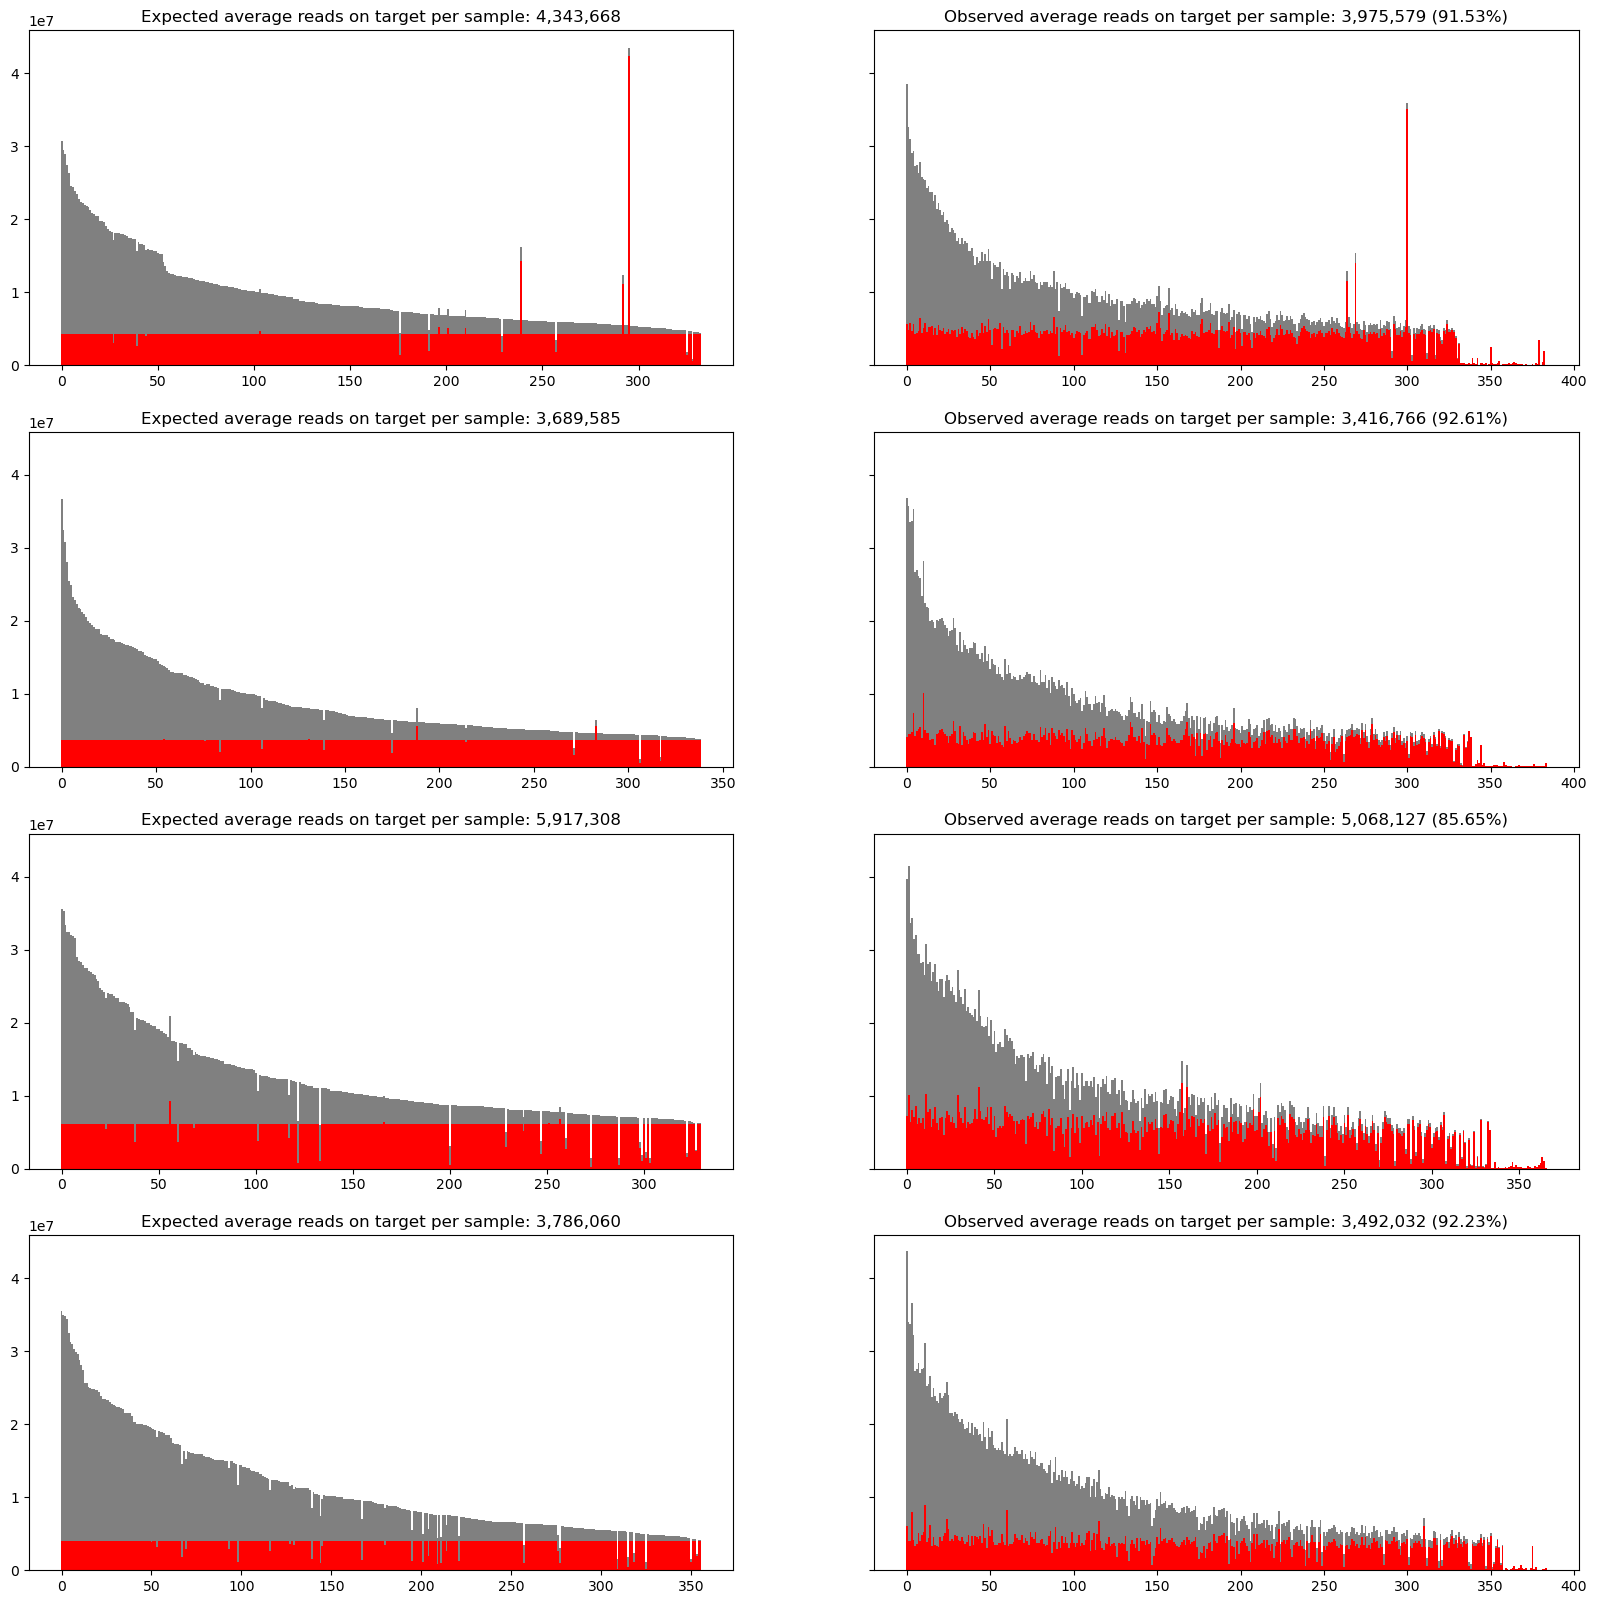

In [8]:
##setup subplots, 4 sets, 2 results so 4 rows by 2 columns
index=0
rows=4
columns=2
f, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20,20),sharey=True)

for metaT_set in metaT_df['Compressed Plate Name'].unique():
    print(index)
    plate_df = metaT_df.loc[metaT_df['Compressed Plate Name']==metaT_set]
    plate_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)
    plot_df = plate_df.reset_index()
    
    ##Projected
    axes[index,0].bar(range(plot_df.shape[0]), plot_df['projected_HO_non_ribo'], width=1, color='r')
    axes[index,0].bar(range(plot_df.shape[0]), plot_df['projected_HO_ribo'], bottom=plot_df['projected_HO_non_ribo'],
             width=1, align='center',color='gray')
    expected_mean = plot_df['projected_HO_non_ribo'].mean()
    axes[index,0].set_title('Expected average reads on target per sample: '+ 
                      "{:,}".format(int(expected_mean)))
    
    ##Observed
    plate_df.sort_values(by='ribo_reads_NS',ascending=False,inplace=True)
    plot_df = plate_df.reset_index()
    axes[index,1].bar(range(plot_df.shape[0]), plot_df['non_ribo_reads_NS'], width=1, color='r')
    axes[index,1].bar(range(plot_df.shape[0]), plot_df['ribo_reads_NS'], bottom=plot_df['non_ribo_reads_NS'],
             width=1, align='center',color='gray')
    observed_mean = plot_df['non_ribo_reads_NS'].mean()
    axes[index,1].set_title('Observed average reads on target per sample: '+ 
                      "{:,} ({:.2f}%)".format(int(observed_mean),float(observed_mean/expected_mean)*100))
    plot_df = plate_df.reset_index()
    index += 1
plt.show()

In [9]:
metaT_df['Compressed Plate Name'].unique()

array(['ww_metaT_14488_1A-1D', 'ww_metaT_14488_2A-2D',
       'ww_metaT_14488_3A-3D', 'ww_metaT_14488_4A-4D'], dtype=object)

# Choosing Set 2 for Figure 2

In [10]:
subplot_df = metaT_df.loc[metaT_df['Compressed Plate Name']=='ww_metaT_14488_2A-2D']

Total Reads from iSeq sequencing.

In [11]:
# Calculating Reads%Index ~ proportion.
# Proportion_TR ~ Reads%Index on raw reads
subplot_df['proportion_tr']=subplot_df['Total Reads']/(subplot_df['Total Reads'].sum())
# counts ~ non_ribo_reads
# Proportion ~ Reads%Index on non_ribo_reads
subplot_df['proportion']=subplot_df['counts']/(subplot_df['counts'].sum())

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/3847185909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['proportion_tr']=subplot_df['Total Reads']/(subplot_df['Total Reads'].sum())
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/3847185909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['proportion']=subplot_df['counts']/(subplot_df['counts'].sum())


<AxesSubplot:xlabel='proportion', ylabel='Count'>

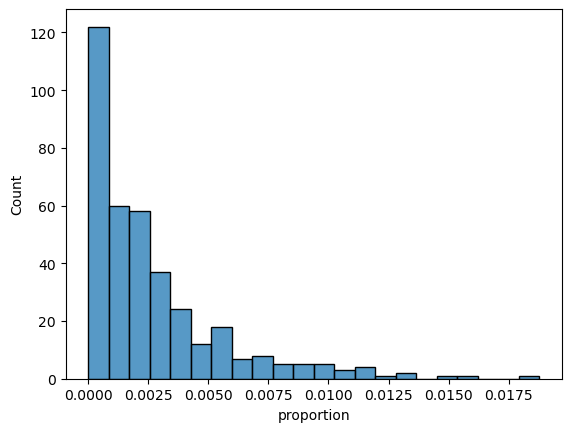

In [12]:
sns.histplot(plate_df['proportion'])

In [13]:
#LoadingFactor on non_ribo_reads
subplot_df['LoadingFactor']=max(subplot_df['proportion'])/(subplot_df['proportion'])
#LoadingFactor_tr on Total Reads
subplot_df['LoadingFactor_tr']=max(subplot_df['proportion_tr'])/(subplot_df['proportion_tr'])

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/3857538689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['LoadingFactor']=max(subplot_df['proportion'])/(subplot_df['proportion'])
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/3857538689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['LoadingFactor_tr']=max(subplot_df['proportion_tr'])/(subplot_df['proportion_tr'])


In [14]:
#Different clipping values
l_100x= 1
h_100x= 100
l_50x = 2
h_50x = 100
l_20x = 2
h_20x = 40
subplot_df['new_pooling_tr'] = np.clip(subplot_df['LoadingFactor_tr'],l_100x,h_100x)
subplot_df['new_pooling_50'] = np.clip(subplot_df['LoadingFactor'],l_50x,h_50x)
subplot_df['new_pooling_20'] = np.clip(subplot_df['LoadingFactor'],l_20x,h_20x)

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2458218260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['new_pooling_tr'] = np.clip(subplot_df['LoadingFactor_tr'],l_100x,h_100x)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2458218260.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['new_pooling_50'] = np.clip(subplot_df['LoadingFactor'],l_50x,h_50x)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2458218260.py:10: SettingW

Text(0.5, 1.0, '20X')

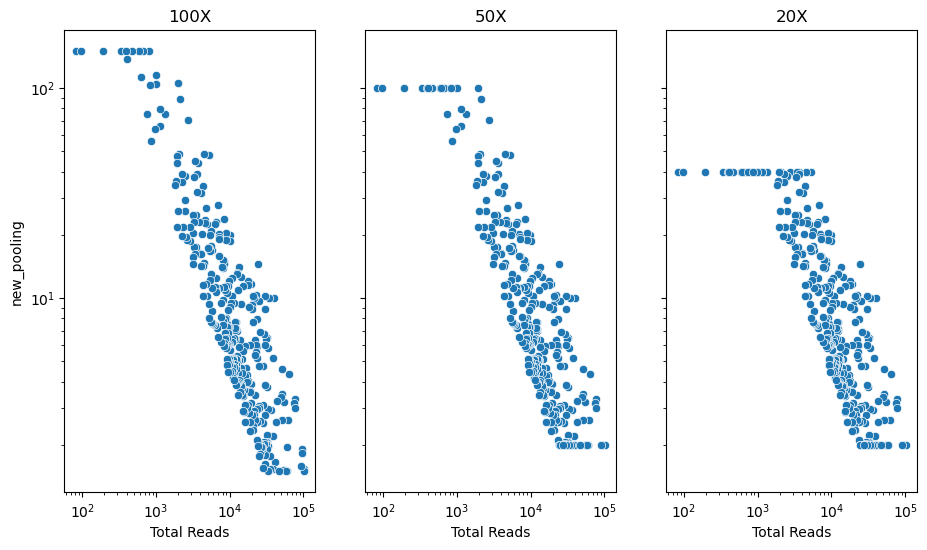

In [15]:
f, (ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(11,6),sharey=True)
sns.scatterplot(x='Total Reads',y='new_pooling',data=subplot_df,ax=ax1)
sns.scatterplot(x='Total Reads',y='new_pooling_50',data=subplot_df,ax=ax2)
sns.scatterplot(x='Total Reads',y='new_pooling_20',data=subplot_df,ax=ax3)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('100X')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('50X')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('20X')

In [16]:
#Proportion of samples clipped
sum((subplot_df['LoadingFactor']<l_100x)|(subplot_df['LoadingFactor']>h_100x))/subplot_df.shape[0]

0.10677083333333333

In [17]:
#Proportion of samples clipped
sum((plate_df['LoadingFactor']<l_50x)|(plate_df['LoadingFactor']>h_50x))/plate_df.shape[0]

0.16927083333333334

In [18]:
#Proportion of samples clipped
sum((plate_df['LoadingFactor']<l_20x)|(plate_df['LoadingFactor']>h_20x))/plate_df.shape[0]

0.265625

In [19]:
#100X dynamic range clipping
subplot_df['projected_reads'] = subplot_df['Total Reads'] * np.clip(subplot_df['LoadingFactor'],l_100x,h_100x)
subplot_df['projected_reads_tr'] = subplot_df['Total Reads'] * np.clip(subplot_df['LoadingFactor_tr'],l_100x,h_100x)

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/3378221846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_reads'] = subplot_df['Total Reads'] * np.clip(subplot_df['LoadingFactor'],l_100x,h_100x)
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/3378221846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_reads_tr'] = subplot_df['Total Reads'] * np.clip(subplot_df['LoadingFactor_tr'],l_100x,h_100x)


In [20]:
subplot_df['projected_proportion'] = subplot_df['projected_reads']/(subplot_df['projected_reads'].sum())
subplot_df['projected_proportion_tr'] = subplot_df['projected_reads_tr']/(subplot_df['projected_reads_tr'].sum())

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/346399103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_proportion'] = subplot_df['projected_reads']/(subplot_df['projected_reads'].sum())
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/346399103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_proportion_tr'] = subplot_df['projected_reads_tr']/(subplot_df['projected_reads_tr'].sum())


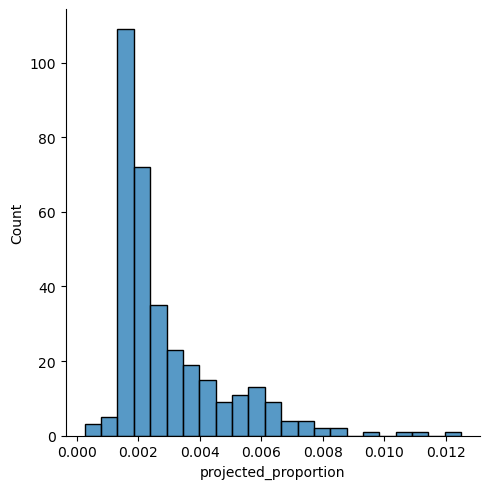

In [21]:
sns.displot(subplot_df['projected_proportion'])

Total Reads NS are Total Reads observed from an actual NovaSeq run ~ 3B reads. 

In [22]:
subplot_df['Total Reads NS'].sum()

2964015020.0

In [23]:
subplot_df['projected_HO_reads'] = subplot_df['projected_proportion'] * subplot_df['Total Reads NS'].sum()
subplot_df['projected_HO_reads_tr'] = subplot_df['projected_proportion_tr'] * subplot_df['Total Reads NS'].sum()

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/1322953499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_HO_reads'] = subplot_df['projected_proportion'] * subplot_df['Total Reads NS'].sum()
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/1322953499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_HO_reads_tr'] = subplot_df['projected_proportion_tr'] * subplot_df['Total Reads NS'].sum()


In [24]:
subplot_df['projected_HO_non_ribo'] = subplot_df['perc_non_ribo'] * subplot_df['projected_HO_reads']
subplot_df['projected_HO_non_ribo_tr'] = subplot_df['perc_non_ribo'] * subplot_df['projected_HO_reads_tr']

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2240411781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_HO_non_ribo'] = subplot_df['perc_non_ribo'] * subplot_df['projected_HO_reads']
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2240411781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_HO_non_ribo_tr'] = subplot_df['perc_non_ribo'] * subplot_df['projected_HO_reads_tr']


In [25]:
subplot_df['projected_HO_ribo'] = (1-subplot_df['perc_non_ribo']) * subplot_df['projected_HO_reads']
subplot_df['projected_HO_ribo_tr'] = (1-subplot_df['perc_non_ribo']) * subplot_df['projected_HO_reads_tr']

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/538695594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_HO_ribo'] = (1-subplot_df['perc_non_ribo']) * subplot_df['projected_HO_reads']
/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/538695594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df['projected_HO_ribo_tr'] = (1-subplot_df['perc_non_ribo']) * subplot_df['projected_HO_reads_tr']


In [26]:
subplot_df['projected_HO_non_ribo'].sum()/subplot_df['Total Reads NS'].sum()


0.4216373680001023

In [27]:
subplot_df['projected_HO_ribo'].sum()/subplot_df['Total Reads NS'].sum()

0.5783626319998976

In [28]:
subplot_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)

/var/folders/q5/4xfrgckx5r93brcbdshfx3_c0000gp/T/ipykernel_26561/2896211383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subplot_df.sort_values(by='projected_HO_ribo',ascending=False,inplace=True)


In [29]:
subplot_df.columns

Index(['Unnamed: 0', 'Sample', 'Row', 'Col', 'Blank', 'Project Plate',
       'Project Name', 'Compressed Plate Name', 'Well', 'Sample_Project',
       'Sample DNA Concentration', 'Sample RNA Concentration',
       'Sample cDNA Concentration', 'Sample DNAse Concentration', 'Diluted',
       'Normalized cDNA volume', 'Normalized water volume', 'Library Well',
       'index', 'index combo', 'index combo seq', 'i5 name', 'i5 sequence',
       'i5 well', 'i5 plate', 'i7 name', 'i7 sequence', 'i7 well', 'i7 plate',
       'MiniPico Library DNA Concentration', 'MiniPico Library Concentration',
       'Input DNA', 'MiniPico Pooled Volume', 'sample sheet Sample_ID',
       'Unique Reads', 'Duplicate Reads', 'Total Reads', 'wol_counts',
       'perc_pass_wol', 'rep200_counts', 'perc_pass_rep', 'counts',
       'perc_non_ribo', 'proportion', 'LoadingFactor', 'new_pooling',
       'new_pooling_50', 'new_pooling_20', 'projected_reads',
       'projected_proportion', 'projected_HO_reads', 'projecte

# Figure 2 from paper

In [ ]:
plt.style.use('ggplot')


f, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(11,5),sharey=True)
plot_df = subplot_df.loc[~plate_df['projected_HO_ribo'].isnull()].reset_index()
plt.sca(ax1)
plt.bar(range(plot_df.shape[0]), plot_df['projected_HO_non_ribo_tr'], width=1, color='r')
plt.bar(range(plot_df.shape[0]), plot_df['projected_HO_ribo_tr'], bottom=plot_df['projected_HO_non_ribo_tr'],
         width=1, align='center',color='gray')
plt.title('Normalization of raw read counts')
plt.xlabel('Samples')
plt.ylabel('Projected Reads')
plt.sca(ax2)
plt.yscale('log')
plt.title('Normalization of reads on target')
plt.xlabel('Samples')
plt.ylabel('Projected Reads')

plt.bar(range(plot_df.shape[0]), plot_df['projected_HO_non_ribo'], width=1, color='r')
plt.bar(range(plot_df.shape[0]), plot_df['projected_HO_ribo'], bottom=plot_df['projected_HO_non_ribo'],
         width=1, align='center',color='gray')
plt.legend(['Reads On Target','Reads Off Target'],loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,ncol=2)

plt.sca(ax3)
plt.bar(range(plot_df.shape[0]), plot_df['non_ribo_reads_NS'], width=1, color='r')
plt.bar(range(plot_df.shape[0]), plot_df['ribo_reads_NS'], bottom=plot_df['non_ribo_reads_NS'],
         width=1, align='center',color='gray')

plt.title('Normalization of reads on target')
plt.xlabel('Samples')
plt.ylabel('Observed Reads')
plt.yscale('log')
plt.tight_layout()
plt.savefig('./metatranscriptomics_feature_space_norm_wlegend.png')
plt.show()